In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17, 8
rcParams['font.family'] ='AppleGothic'

In [2]:
red = pd.read_csv('winequality-red.csv',sep=';')
red['type']=0
red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


In [3]:
white = pd.read_csv('winequality-white.csv',sep=';')
white['type']=1
white.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1


In [4]:
print(red.shape)
print(white.shape)

(1599, 13)
(4898, 13)


In [5]:
# red랑 white를 합쳐주세요
wine = pd.concat([red, white],axis=0,ignore_index=True)
print(wine.shape)
wine.head(3)

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [7]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [8]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [9]:
#Tuple정렬하기 : sorted(tuple, key) method
list(sorted((wine.quality.unique())))

[3, 4, 5, 6, 7, 8, 9]

**Q.각각의 품질등급마다 몇개의 와인이 있는지 count해주세요**

In [10]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

**Q.9등급을 받은 5개의 와인을 찾아주세요**

In [11]:
wine[wine.quality==9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


### EDA

In [12]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [13]:
#fixed acidity -> fixed_acidity

In [14]:
wine.columns = wine.columns.str.replace(' ','_')
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [15]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


- 그룹별분석? 와인등급에 따라서 품질이 얼마나 다를까?

In [16]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [17]:
red_quality = wine.loc[wine.type==0,'quality']
white_quality = wine.loc[wine.type==1,'quality']

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


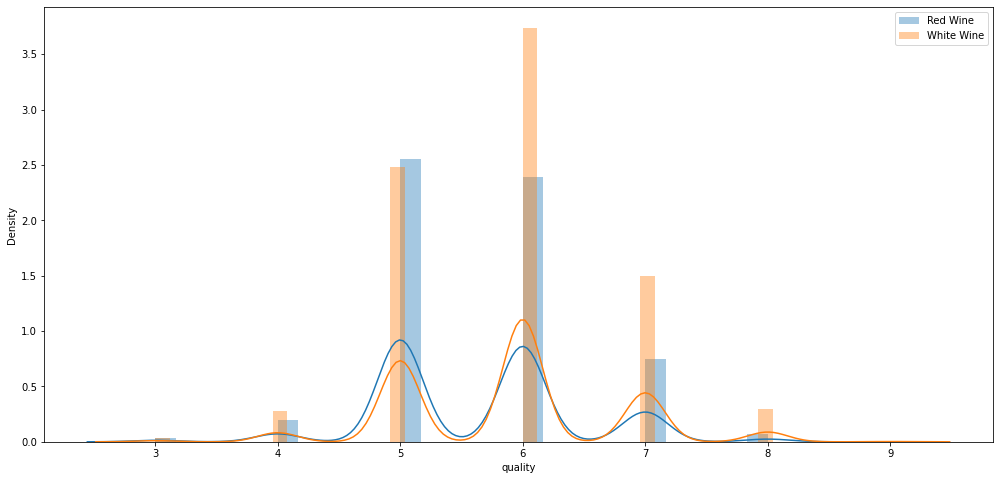

In [18]:
sns.distplot(red_quality,label='Red Wine')
sns.distplot(white_quality,label='White Wine')
plt.legend()

### T검정
- 와인종류에 따른 품질의 차이가 통계적으로 유의한지 알기위해
- p-value < 0.5:95% 이상의 신뢰수준으로 두 그룹간 품질의 차이가 통계적으로 유의하다
- 0.000000 : 99.999999% 신뢰수준.

In [19]:
!pip install statsmodels
import statsmodels.api as sm

In [20]:
t, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [21]:
'T값은 %.3f 이고, p-value는 %10f'%(t,pvalue)

'T값은 -9.686 이고, p-value는   0.000000'

In [26]:
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


In [27]:
#한 칼럼만 보고싶을때
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile_acidity       -0.265699
chlorides              -0.200666
fixed_acidity          -0.076743
total_sulfur_dioxide   -0.041385
residual_sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free_sulfur_dioxide     0.055463
citric_acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

### 산점도그래프

In [30]:
#레드와인 300개 화이트와인 300개 랜덤 샘플링
def sampling(data,n=300):
    return data.loc[np.random.choice(data.index,replace=False,size=n)]

In [37]:
red = wine[wine.type==0]
white = wine[wine.type==1]

In [38]:
red_sample = sampling(red)
print(red_sample.shape)
red_sample.head(1)

(300, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
567,8.7,0.7,0.24,2.5,0.226,5.0,15.0,0.9991,3.32,0.6,9.0,6,0


In [39]:
white_sample = sampling(white)
print(white_sample.shape)
white_sample.head(1)

(300, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
6274,5.7,0.21,0.37,4.5,0.04,58.0,140.0,0.99332,3.29,0.62,10.6,6,1


In [40]:
wine_sample = pd.concat([red_sample,white_sample],axis=0)
print(wine_sample.shape)

(600, 13)


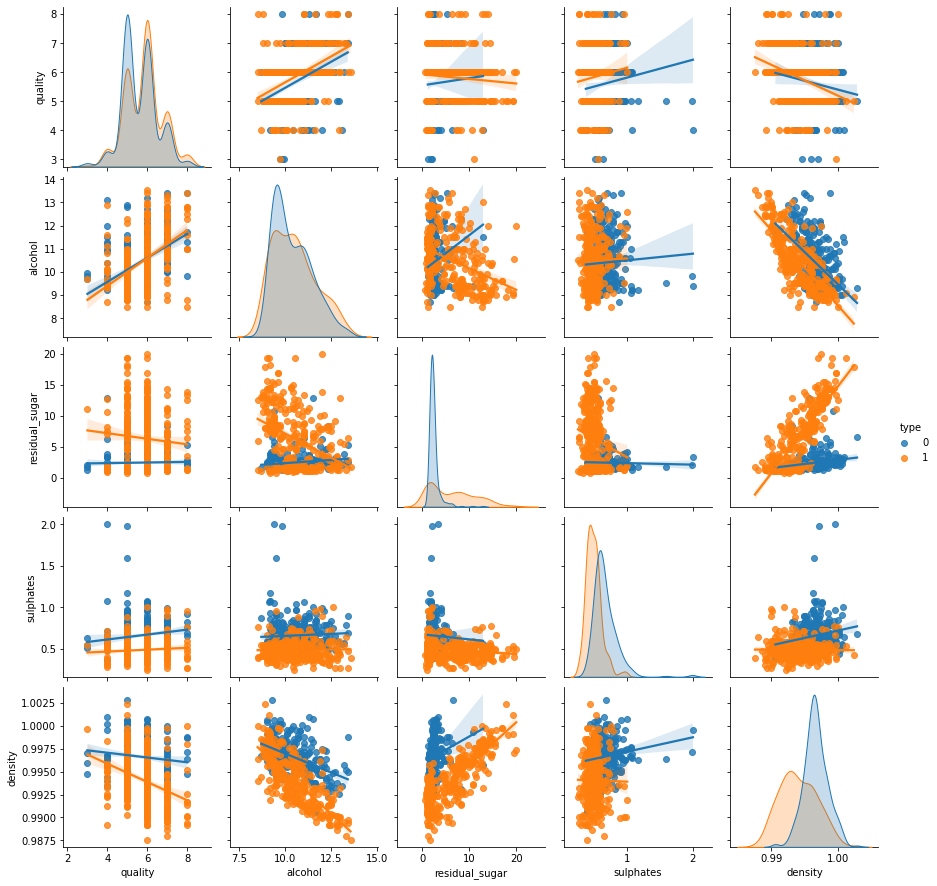

In [43]:
sns.pairplot(data=wine_sample,kind='reg', hue='type',vars=['quality','alcohol','residual_sugar','sulphates','density'])
plt.show()